In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import PIL,os,pathlib,PIL.Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import*

In [2]:
veri=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",sep=',',names=['class','cap-shape',' cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',' stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
veri.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
veri.isnull().sum()

class                        0
cap-shape                    0
 cap-surface                 0
cap-color                    0
bruises                      0
odor                         0
gill-attachment              0
gill-spacing                 0
gill-size                    0
gill-color                   0
stalk-shape                  0
stalk-root                   0
stalk-surface-above-ring     0
 stalk-surface-below-ring    0
stalk-color-above-ring       0
stalk-color-below-ring       0
veil-type                    0
veil-color                   0
ring-number                  0
ring-type                    0
spore-print-color            0
population                   0
habitat                      0
dtype: int64

In [4]:
veri.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   class                      8124 non-null   object
 1   cap-shape                  8124 non-null   object
 2    cap-surface               8124 non-null   object
 3   cap-color                  8124 non-null   object
 4   bruises                    8124 non-null   object
 5   odor                       8124 non-null   object
 6   gill-attachment            8124 non-null   object
 7   gill-spacing               8124 non-null   object
 8   gill-size                  8124 non-null   object
 9   gill-color                 8124 non-null   object
 10  stalk-shape                8124 non-null   object
 11  stalk-root                 8124 non-null   object
 12  stalk-surface-above-ring   8124 non-null   object
 13   stalk-surface-below-ring  8124 non-null   object
 14  stalk-co

In [8]:
le=LabelEncoder()
for x in veri.columns:
    if veri[x].dtypes=='object':
        veri[x]=le.fit_transform(veri[x])

In [9]:
veri.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<AxesSubplot:>

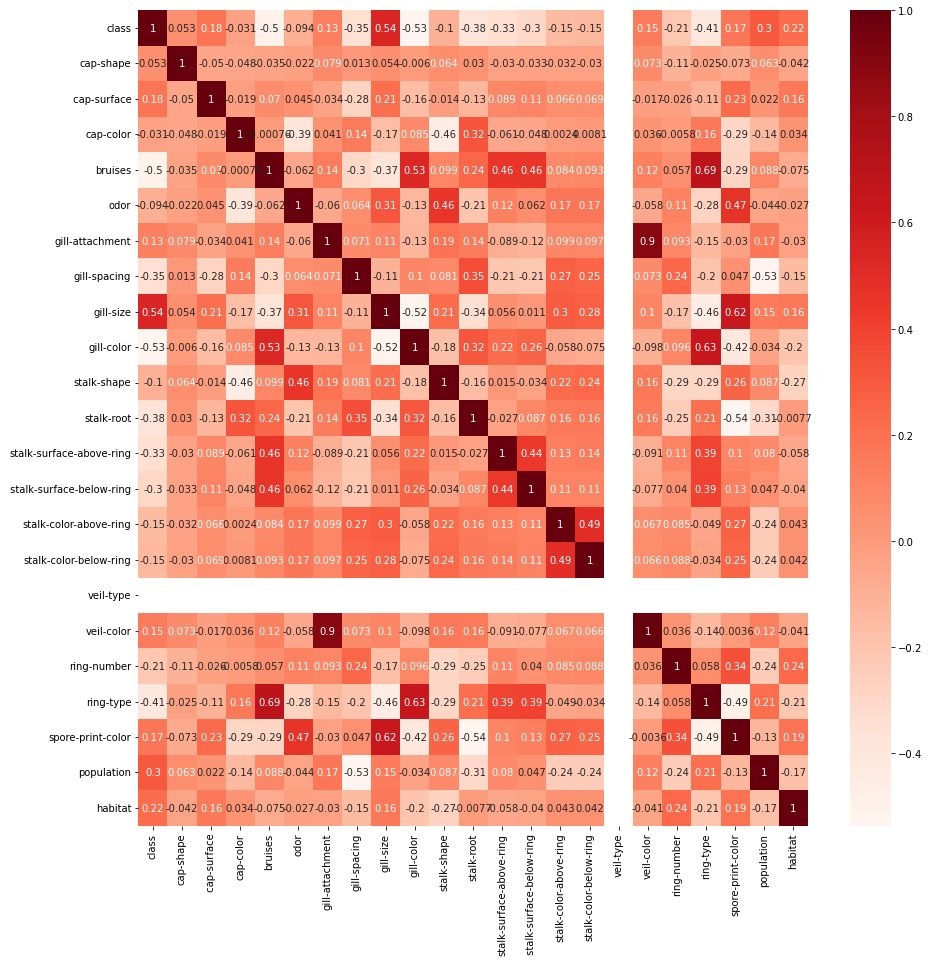

In [34]:
plt.figure(figsize=(15,15))
cor=veri.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

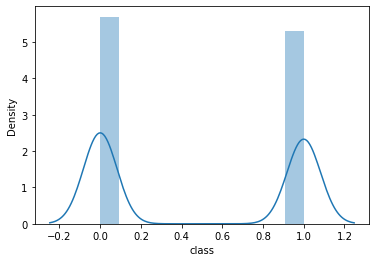

In [37]:
sns.distplot(veri['class'])

In [10]:
x=veri.drop('class',axis=1)
y=veri['class']
x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
model=[]
model.append(('model_knn',KNeighborsClassifier()))
model.append(('model_nb',GaussianNB()))
model.append(('model_tree',DecisionTreeClassifier(max_depth=4)))
model.append(('model_lr',LogisticRegression()))

In [27]:
for name,k in model:
    kfold=KFold(n_splits=10,random_state=0,shuffle=True)
    sonuclar=cross_val_score(k,x_egitim,y_egitim,cv=kfold,scoring='accuracy')
    print(name," ICIN KFOLD SONUCU = ",sonuclar.mean())

model_knn  ICIN KFOLD SONUCU =  0.9983069811544387
model_nb  ICIN KFOLD SONUCU =  0.9229114614199361
model_tree  ICIN KFOLD SONUCU =  0.9767654379518784


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

model_lr  ICIN KFOLD SONUCU =  0.9490683892378808


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [32]:
for name,k in model:
    k.fit(x_egitim,y_egitim)
    tahmin_egitim=k.predict(x_egitim)
    tahmin_test=k.predict(x_test)
    print(name," ICIN EGITIM TAHMIN SONUCLARI: %.2f"%accuracy_score(y_egitim,tahmin_egitim))
    print(name," ICIN TAHMIN TEST SONUCLARI: %.2f"%accuracy_score(y_test,tahmin_test))
    print()

model_knn  ICIN EGITIM TAHMIN SONUCLARI: 1.00
model_knn  ICIN TAHMIN TEST SONUCLARI: 1.00

model_nb  ICIN EGITIM TAHMIN SONUCLARI: 0.92
model_nb  ICIN TAHMIN TEST SONUCLARI: 0.92

model_tree  ICIN EGITIM TAHMIN SONUCLARI: 0.98
model_tree  ICIN TAHMIN TEST SONUCLARI: 0.98

model_lr  ICIN EGITIM TAHMIN SONUCLARI: 0.95
model_lr  ICIN TAHMIN TEST SONUCLARI: 0.96



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(classification_report(y_test,tahmin_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       852
           1       0.96      0.95      0.95       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## 